## Importar librerías

In [13]:
import pandas as pd
import numpy as np

## Importar datos

In [14]:
compras = pd.read_csv("Compras.csv",sep=";")

In [15]:
compras.head(5)

,Fecha,Item,Margen,Cantidad,Inventario,Precio,Mes,Compra,Tienda
0,4/03/2021,2921,30,5,0,0,3,0,FERRETERIA
1,4/03/2021,2941,20,2,1,0,3,0,OBRA BLANCA
2,12/03/2021,3186,20,2,1,1,3,1,OBRA BLANCA
3,22/03/2021,3346,25,20,0,0,3,0,OBRA BLANCA
4,23/03/2021,3360,15,4,0,1,3,1,OBRA BLANCA


## Eliminar compras a Soferco 

In [6]:
#compras = compras[compras['Compra']==0]

## Mapeo de datos

Se transforman algunos de los datos de entrada en valores categóricos.

In [16]:
#Mapeo Tienda

compras['Tienda_map'] = compras['Tienda'].map({'FERRETERIA':1,
                                               'OBRA BLANCA':2,
                                               'HOGAR':3,
                                               'OBRA NEGRA':4
                                              }).astype(int)
    

## Eliminar las columnas que no se necesitan

In [27]:
elementos_eliminar = ['Fecha','Item','Tienda','Margen','Cantidad']

compras_analizar = compras.drop(elementos_eliminar, axis = 1)

In [28]:
compras_analizar

,Inventario,Precio,Mes,Compra,Tienda_map
0,0,0,3,0,1
1,1,0,3,0,2
2,1,1,3,1,2
3,0,0,3,0,2
4,0,1,3,1,2
...,...,...,...,...,...
152,1,1,2,0,1
153,1,1,2,0,1
154,0,0,2,0,1
155,0,1,3,0,1


## Determinar la profundidad del árbol

In [29]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

In [30]:
cv = KFold(n_splits=10) # Numero deseado de "folds" que haremos
accuracies = list()
max_attributes = len(list(compras_analizar))
depth_range = range(1, max_attributes + 1)

# Testearemos la profundidad de 1 a cantidad de atributos +1
for depth in depth_range:
    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(criterion='entropy',
                                             min_samples_split=20,
                                             min_samples_leaf=5,
                                             max_depth = depth,
                                             class_weight={1:6.03})
    for train_fold, valid_fold in cv.split(compras_analizar):
        f_train = compras_analizar.loc[train_fold] 
        f_valid = compras_analizar.loc[valid_fold] 

        model = tree_model.fit(X = f_train.drop(['Compra'], axis=1), 
                               y = f_train['Compra']) 
        valid_acc = model.score(X = f_valid.drop(['Compra'], axis=1), 
                                y = f_valid['Compra']) # calculamos la precision con el segmento de validacion
        fold_accuracy.append(valid_acc)

    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    
# Mostramos los resultados obtenidos
df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df = df[["Max Depth", "Average Accuracy"]]
print(df.to_string(index=False))

 Max Depth  Average Accuracy
         1          0.652083
         2          0.652083
         3          0.747500
         4          0.740833
         5          0.740833


Vemos que la mayor precisión se encuentra en 4 niveles de split

## Árbol de decisión

Asignamos los parámetros y una profundidad de 4 niveles

In [33]:
# Crear arrays de entrenamiento y las etiquetas que indican si llegó a top o no 
y_train = compras_analizar['Compra']
x_train = compras_analizar.drop(['Compra'], axis=1).values 

# Crear Arbol de decision con profundidad = 4
decision_tree = tree.DecisionTreeClassifier(criterion='entropy',
                                            min_samples_split=20,
                                            min_samples_leaf=5,
                                            max_depth = 4,
                                            class_weight={1:6.03})
decision_tree.fit(x_train, y_train)


#compras_analizar.columns

DecisionTreeClassifier(class_weight={1: 6.03}, criterion='entropy', max_depth=4,
                       min_samples_leaf=5, min_samples_split=20)

### Visualizar árbol

[Text(0.3333333333333333, 0.9, 'Tienda_map <= 1.5\nentropy = 0.994\nsamples = 157\nvalue = [131.0, 156.78]\nclass = Compra'),
 Text(0.2222222222222222, 0.7, 'entropy = 0.0\nsamples = 76\nvalue = [76, 0]\nclass = No compra'),
 Text(0.4444444444444444, 0.7, 'Tienda_map <= 2.5\nentropy = 0.826\nsamples = 81\nvalue = [55.0, 156.78]\nclass = Compra'),
 Text(0.2222222222222222, 0.5, 'Precio <= 0.5\nentropy = 0.457\nsamples = 23\nvalue = [9.0, 84.42]\nclass = Compra'),
 Text(0.1111111111111111, 0.3, 'entropy = 0.628\nsamples = 17\nvalue = [9.0, 48.24]\nclass = Compra'),
 Text(0.3333333333333333, 0.3, 'entropy = 0.0\nsamples = 6\nvalue = [0.0, 36.18]\nclass = Compra'),
 Text(0.6666666666666666, 0.5, 'Tienda_map <= 3.5\nentropy = 0.964\nsamples = 58\nvalue = [46.0, 72.36]\nclass = Compra'),
 Text(0.5555555555555556, 0.3, 'entropy = 0.0\nsamples = 18\nvalue = [18, 0]\nclass = No compra'),
 Text(0.7777777777777778, 0.3, 'Inventario <= 0.5\nentropy = 0.854\nsamples = 40\nvalue = [28.0, 72.36]\ncla

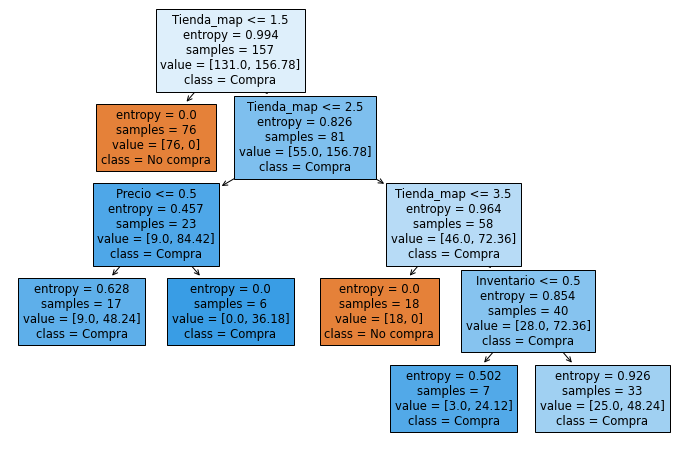

In [35]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

plot_tree(decision_tree = decision_tree,
         feature_names = ['Inventario', 'Precio', 'Mes', 'Tienda_map'],
        class_names = ['No compra', 'Compra'],
         filled = True)